In [63]:
import pandas as pd
import numpy as np
from ggplot import *
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
vehicles = pd.read_csv("vehicles.csv")
vehicles.head

C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<bound method DataFrame.head of        barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0      15.695714         0.0        0.0        0.0      19      0.0        0   
1      29.964545         0.0        0.0        0.0       9      0.0        0   
2      12.207778         0.0        0.0        0.0      23      0.0        0   
3      29.964545         0.0        0.0        0.0      10      0.0        0   
4      17.347895         0.0        0.0        0.0      17      0.0        0   
5      14.982273         0.0        0.0        0.0      21      0.0        0   
6      13.184400         0.0        0.0        0.0      22      0.0        0   
7      13.733750         0.0        0.0        0.0      23      0.0        0   
8      12.677308         0.0        0.0        0.0      23      0.0        0   
9      13.184400         0.0        0.0        0.0      23      0.0        0   
10     12.677308         0.0        0.0        0.0      23      0.0        0   
11     1

In [4]:
column_names = vehicles.columns.values
column_names[[70, 71, 72, 73, 74, 76, 79]]

array(['fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr',
       'c240bDscr', 'startStop'], dtype=object)

In [5]:
len(vehicles)

37716

In [6]:
len(vehicles.columns)

83

In [7]:
print(vehicles.columns)

Index([u'barrels08', u'barrelsA08', u'charge120', u'charge240', u'city08',
       u'city08U', u'cityA08', u'cityA08U', u'cityCD', u'cityE', u'cityUF',
       u'co2', u'co2A', u'co2TailpipeAGpm', u'co2TailpipeGpm', u'comb08',
       u'comb08U', u'combA08', u'combA08U', u'combE', u'combinedCD',
       u'combinedUF', u'cylinders', u'displ', u'drive', u'engId', u'eng_dscr',
       u'feScore', u'fuelCost08', u'fuelCostA08', u'fuelType', u'fuelType1',
       u'ghgScore', u'ghgScoreA', u'highway08', u'highway08U', u'highwayA08',
       u'highwayA08U', u'highwayCD', u'highwayE', u'highwayUF', u'hlv', u'hpv',
       u'id', u'lv2', u'lv4', u'make', u'model', u'mpgData', u'phevBlended',
       u'pv2', u'pv4', u'range', u'rangeCity', u'rangeCityA', u'rangeHwy',
       u'rangeHwyA', u'trany', u'UCity', u'UCityA', u'UHighway', u'UHighwayA',
       u'VClass', u'year', u'youSaveSpend', u'guzzler', u'trans_dscr',
       u'tCharger', u'sCharger', u'atvType', u'fuelType2', u'rangeA',
       u'evMotor', u

In [11]:
len(pd.unique(vehicles.year))

34

In [12]:
min(vehicles.year)

1984

In [13]:
max(vehicles["year"])

2017

In [14]:
pd.value_counts(vehicles.fuelType1)

Regular Gasoline     26261
Premium Gasoline     10110
Diesel                1096
Electricity            115
Midgrade Gasoline       74
Natural Gas             60
Name: fuelType1, dtype: int64

In [15]:
pd.value_counts(vehicles.trany)

Automatic 4-spd                     11041
Manual 5-spd                         8309
Automatic 3-spd                      3151
Automatic (S6)                       2616
Manual 6-spd                         2421
Automatic 5-spd                      2184
Manual 4-spd                         1483
Automatic 6-spd                      1432
Automatic (S8)                        942
Automatic (S5)                        824
Automatic (variable gear ratios)      668
Automatic 7-spd                       650
Auto(AM-S7)                           256
Automatic (S7)                        250
Automatic 8-spd                       243
Automatic (S4)                        233
Auto(AM7)                             150
Auto(AV-S6)                           140
Auto(AM6)                             109
Automatic (A1)                        104
Auto(AM-S6)                            91
Automatic 9-spd                        80
Manual 3-spd                           77
Manual 7-spd                      

In [16]:
vehicles["trany2"] = vehicles.trany.str[0]
pd.value_counts(vehicles.trany2)

A    25327
M    12378
Name: trany2, dtype: int64

In [17]:
#Analyzing automobile fuel efficiency over time with Python

In [18]:
grouped = vehicles.groupby("year")

In [40]:
averaged = grouped['comb08', 'highway08', 'city08'].agg([np.mean])

In [41]:
averaged

,comb08,highway08,city08
,mean,mean,mean
year,,,
1984,19.881874,23.075356,17.982688
1985,19.808348,23.042328,17.878307
1986,19.550413,22.699174,17.665289
1987,19.228549,22.445068,17.310345
1988,19.328319,22.702655,17.333628
1989,19.125759,22.465742,17.143972
1990,19.000928,22.337662,17.033395
1991,18.825972,22.253534,16.848940


In [42]:
averaged.columns = ['comb08_mean','highway08_mean', 'city08_mean']

In [43]:
averaged['year'] = averaged.index

In [44]:
averaged

,comb08_mean,highway08_mean,city08_mean,year
year,,,,
1984,19.881874,23.075356,17.982688,1984
1985,19.808348,23.042328,17.878307,1985
1986,19.550413,22.699174,17.665289,1986
1987,19.228549,22.445068,17.310345,1987
1988,19.328319,22.702655,17.333628,1988
1989,19.125759,22.465742,17.143972,1989
1990,19.000928,22.337662,17.033395,1990
1991,18.825972,22.253534,16.848940,1991
1992,18.862623,22.439786,16.805531,1992


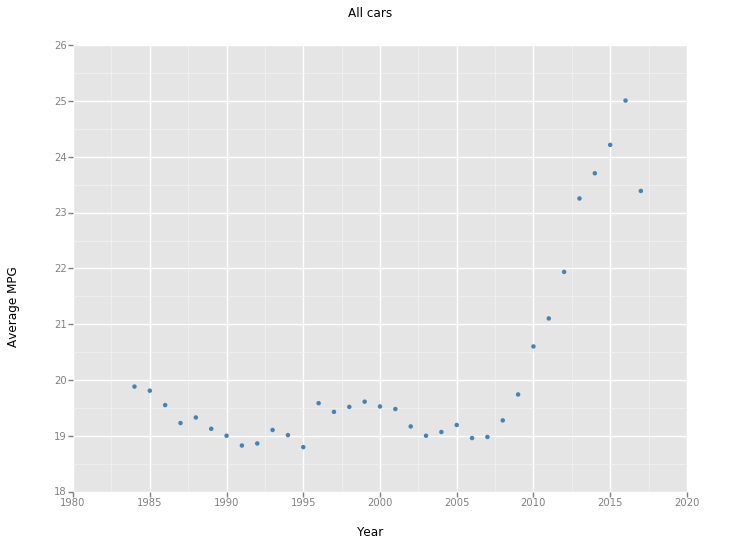

<ggplot: (11821116)>


In [48]:
print ggplot(averaged, aes('year', 'comb08_mean')) + geom_point(color='steelblue') + xlab("Year") + ylab("Average MPG") + ggtitle("All cars")

In [49]:
criteria1 = vehicles.fuelType1.isin(["Regular Gasoline", "Premium Gasoline", "Midgrade Gasoline"])
criteria2 = vehicles.fuelType2.isnull()
criteria3 = vehicles.atvType != "Hybrid"
vehicles_non_hybrid = vehicles[criteria1 & criteria2 & criteria3]
len(vehicles_non_hybrid)

34587

In [50]:
grouped = vehicles_non_hybrid.groupby(['year'])
averaged = grouped['comb08'].agg([np.mean])
print(averaged)

           mean
year           
1984  19.121622
1985  19.394686
1986  19.320457
1987  19.164568
1988  19.367607
1989  19.141964
1990  19.031459
1991  18.838060
1992  18.861566
1993  19.137383
1994  19.092632
1995  18.872591
1996  19.530962
1997  19.368000
1998  19.329545
1999  19.239759
2000  19.169345
2001  19.075058
2002  18.950270
2003  18.761711
2004  18.967339
2005  19.005510
2006  18.786398
2007  18.987512
2008  19.191781
2009  19.738095
2010  20.466736
2011  20.920652
2012  21.496767
2013  22.330481
2014  22.433128
2015  22.551078
2016  22.877111
2017  22.576923


In [51]:
pd.unique(vehicles_non_hybrid.displ)

array([ 2. ,  4.9,  2.2,  5.2,  1.8,  1.6,  2.3,  2.8,  4. ,  5. ,  3.3,
        3.1,  3.8,  4.6,  3.4,  3. ,  5.9,  2.5,  4.5,  6.8,  2.4,  2.9,
        5.7,  4.3,  3.5,  5.8,  3.2,  4.2,  1.9,  2.6,  7.4,  3.9,  1.5,
        1.3,  4.1,  8. ,  6. ,  3.6,  5.4,  5.6,  1. ,  2.1,  1.2,  6.5,
        2.7,  4.7,  5.5,  1.1,  5.3,  4.4,  3.7,  6.7,  4.8,  1.7,  6.2,
        8.3,  1.4,  6.1,  7. ,  8.4,  6.3,  nan,  6.6,  6.4,  0.9])

In [53]:
criteria = vehicles_non_hybrid.displ.notnull()
vehicles_non_hybrid = vehicles_non_hybrid[criteria]
vehicles_non_hybrid.displ = vehicles_non_hybrid.displ.astype('float')
criteria = vehicles_non_hybrid.comb08.notnull()
vehicles_non_hybrid = vehicles_non_hybrid[criteria]
vehicles_non_hybrid.comb08 = vehicles_non_hybrid.comb08.astype('float')

C:\Anaconda2\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


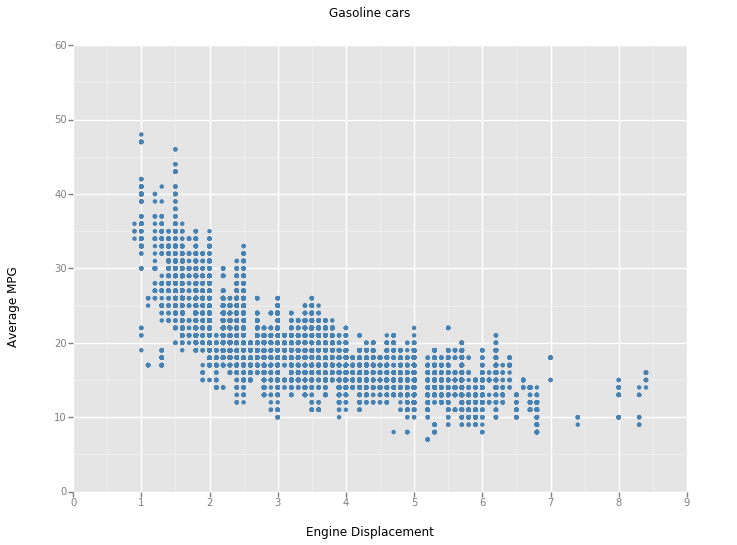

<ggplot: (11827997)>


In [54]:
print ggplot(vehicles_non_hybrid, aes('displ', 'comb08')) + geom_point(color='steelblue') + xlab("Engine Displacement") + ylab("Average MPG") + ggtitle("Gasoline cars")

In [55]:
grouped_by_year = vehicles_non_hybrid.groupby(['year'])
avg_grouped_by_year = grouped_by_year['displ', 'comb08'].agg([np.mean])

In [56]:
avg_grouped_by_year['year'] = avg_grouped_by_year.index
melted_avg_grouped_by_year = pd.melt(avg_grouped_by_year,id_vars='year')

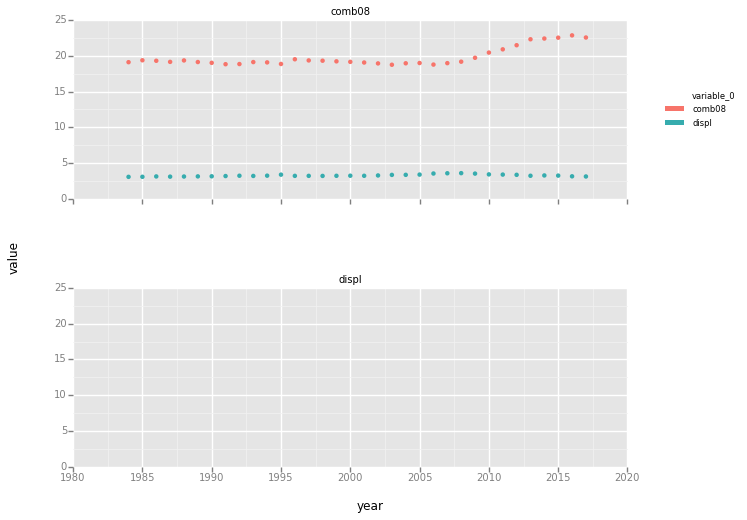

<ggplot: (11839299)>

In [57]:
p = ggplot(aes(x='year', y='value', color = 'variable_0'), data=melted_avg_grouped_by_year)
p + geom_point() + facet_wrap("variable_0")

In [58]:
#Investigating the makes and models of automobiles with Python

In [59]:
pd.unique(vehicles_non_hybrid.cylinders)

array([  4.,  12.,   8.,   6.,   5.,  10.,   2.,   3.,  16.,  nan])

In [60]:
vehicles_non_hybrid.cylinders = vehicles_non_hybrid.cylinders.astype('float')
pd.unique(vehicles_non_hybrid.cylinders)

array([  4.,  12.,   8.,   6.,   5.,  10.,   2.,   3.,  16.,  nan])

In [61]:
vehicles_non_hybrid_4 = vehicles_non_hybrid[(vehicles_non_hybrid.cylinders == 4.0)]

Axes(0.125,0.125;0.775x0.775)


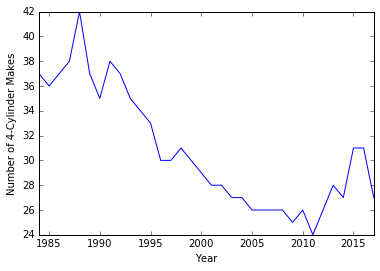

In [64]:
grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby(['year']).make.nunique()
fig = grouped_by_year_4_cylinder.plot()
fig.set_xlabel('Year')
fig.set_ylabel('Number of 4-Cylinder Makes')
print fig

In [92]:
grouped_by_year_4_cylinder = vehicles_non_hybrid_4.groupby(['year'])
unique_makes = []

In [96]:
for name, group in grouped_by_year_4_cylinder:
    unique_makes.append(set(pd.unique(group['make'])))
    unique_makes = reduce(set.intersection, unique_makes)
    
print unique_makes

AttributeError: 'set' object has no attribute 'append'

In [99]:
boolean_mask = []
for index, row in vehicles_non_hybrid_4.iterrows():
    make = row['make']
    boolean_mask.append(make in unique_makes)

df_common_makes = vehicles_non_hybrid_4[boolean_mask]

In [100]:
df_common_makes_grouped = df_common_makes.groupby(['year','make']).agg(np.mean).reset_index()

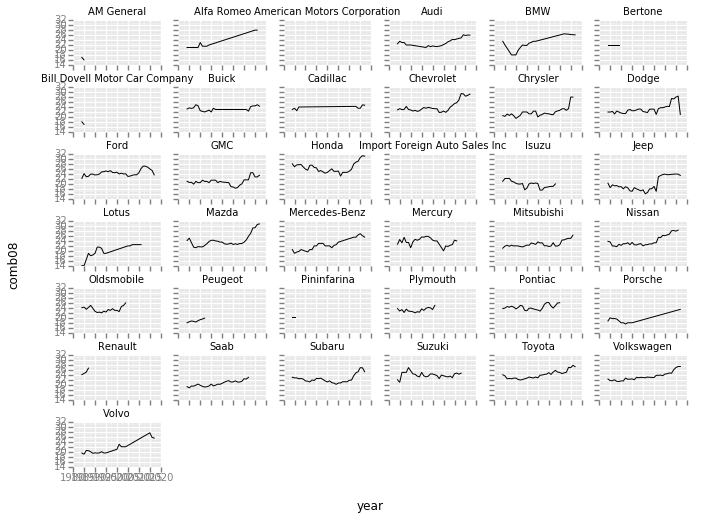

<ggplot: (15717941)>

In [101]:
ggplot(aes(x='year', y='comb08'), data = df_common_makes_grouped) + geom_line() + facet_wrap('make')